In [6]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [7]:
df = pd.read_csv("resources/wine-quality-white-and-red.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df["target"] = pd.get_dummies(df.type, drop_first=True)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'target'],
      dtype='object')

In [11]:
cols = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for col in cols:
    print(col)
    print(df[col].value_counts())
    print()

type
white    4898
red      1599
Name: type, dtype: int64

fixed acidity
6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64

volatile acidity
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: volatile acidity, Length: 187, dtype: int64

citric acid
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
1.23      1
0.99      1
0.88      1
0.75      1
Name: citric acid, Length: 89, dtype: int64

residual sugar
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
12.05      1
6.95       1
9.55       1
20.15      1
3.45       1
Name: residual sugar, Length: 316, dtype: int64

chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.040    182
        ... 
0.610      1
0.290      1
0.360      1
0.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
target                    -0.486740         -0.653036     0.187397   

                   

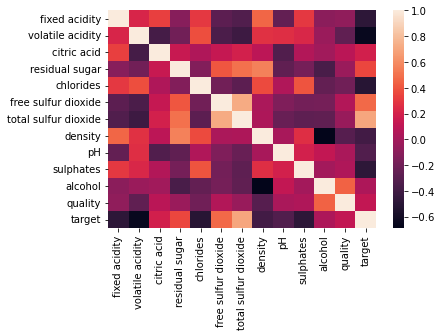

In [12]:
  # check correlations
corrs = df.corr()
print(corrs)
print()
sns.heatmap(corrs)
plt.show()

In [13]:
 abs(df.corr()["target"]).sort_values(ascending=False)

target                  1.000000
total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: target, dtype: float64

In [14]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = df.loc[:, features].values
y = df.loc[:, ["target"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.7 : 0.3


In [15]:
 # recipe
lr = LogisticRegression(max_iter=10000) # init
lr.fit(X_train, y_train) # fit

train_preds = lr.predict(X_train) # predict
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)

In [16]:
 print(test_preds[0:10])
print()
print(test_proba[0:10]) 

[1 1 0 0 1 1 1 0 0 0]

[[8.18486505e-03 9.91815135e-01]
 [3.13496655e-05 9.99968650e-01]
 [9.90660390e-01 9.33960998e-03]
 [9.40126721e-01 5.98732793e-02]
 [8.71767906e-02 9.12823209e-01]
 [5.09375651e-03 9.94906243e-01]
 [1.31230977e-01 8.68769023e-01]
 [9.91857283e-01 8.14271742e-03]
 [9.76708516e-01 2.32914836e-02]
 [8.18153095e-01 1.81846905e-01]]


In [17]:
output = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_train, train_preds)}

{classification_report(y_train, train_preds)}
"""
print(output)

#################################################

output = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output)


METRICS FOR THE TESTING SET:
----------------------------
[[1075   44]
 [  20 3408]]

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1119
           1       0.99      0.99      0.99      3428

    accuracy                           0.99      4547
   macro avg       0.98      0.98      0.98      4547
weighted avg       0.99      0.99      0.99      4547



METRICS FOR THE TESTING SET:
----------------------------
[[ 454   26]
 [   6 1464]]

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       480
           1       0.98      1.00      0.99      1470

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950




In [18]:
sum((y_test - test_proba[:,1])**2)

27.258007940213986

AUC for the Model Test Set: 0.9942821712018141


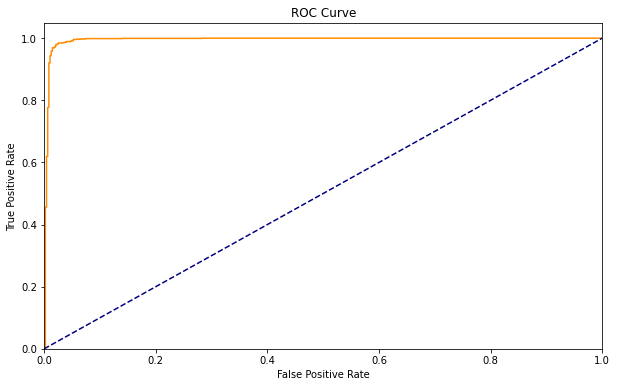

In [19]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1075   44]
 [  20 3408]]

                  precision    recall  f1-score   support

           0       0.98      0.96      0.97      1119
           1       0.99      0.99      0.99      3428

    accuracy                           0.99      4547
   macro avg       0.98      0.98      0.98      4547
weighted avg       0.99      0.99      0.99      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 454   26]
 [   6 1464]]

                  precision    recall  f1-score   support

           0       0.99      0.95      0.97       480
           1       0.98      1.00      0.99      1470

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.98      1950
weighted avg       0.98      0.98      0.98      1950

    

AUC for the Model Test Set: 0.9942821712018141


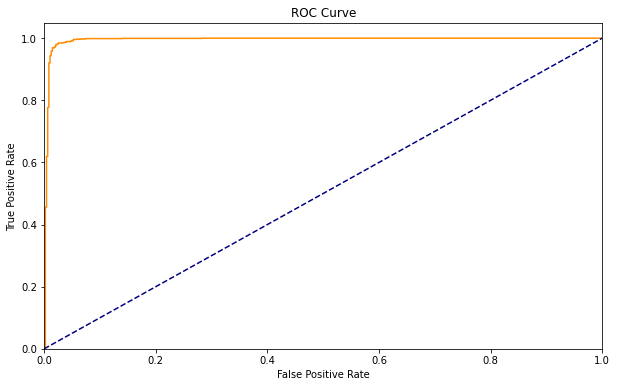

Brier Score:
27.258007940213986


In [21]:
lr = LogisticRegression(max_iter=10000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 911  208]
 [  64 3364]]

                  precision    recall  f1-score   support

           0       0.93      0.81      0.87      1119
           1       0.94      0.98      0.96      3428

    accuracy                           0.94      4547
   macro avg       0.94      0.90      0.92      4547
weighted avg       0.94      0.94      0.94      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 388   92]
 [  38 1432]]

                  precision    recall  f1-score   support

           0       0.91      0.81      0.86       480
           1       0.94      0.97      0.96      1470

    accuracy                           0.93      1950
   macro avg       0.93      0.89      0.91      1950
weighted avg       0.93      0.93      0.93      1950

    

AUC for the Model Test Set: 0.9701155045351475


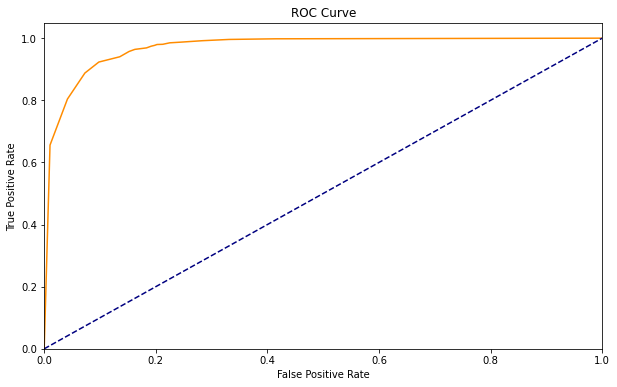

Brier Score:
98.05190311418698


In [22]:
knn_model = KNeighborsClassifier(n_neighbors=17)

evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 893  226]
 [  54 3374]]

                  precision    recall  f1-score   support

           0       0.94      0.80      0.86      1119
           1       0.94      0.98      0.96      3428

    accuracy                           0.94      4547
   macro avg       0.94      0.89      0.91      4547
weighted avg       0.94      0.94      0.94      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 378  102]
 [  32 1438]]

                  precision    recall  f1-score   support

           0       0.92      0.79      0.85       480
           1       0.93      0.98      0.96      1470

    accuracy                           0.93      1950
   macro avg       0.93      0.88      0.90      1950
weighted avg       0.93      0.93      0.93      1950

    

AUC for the Model Test Set: 0.9316772959183673


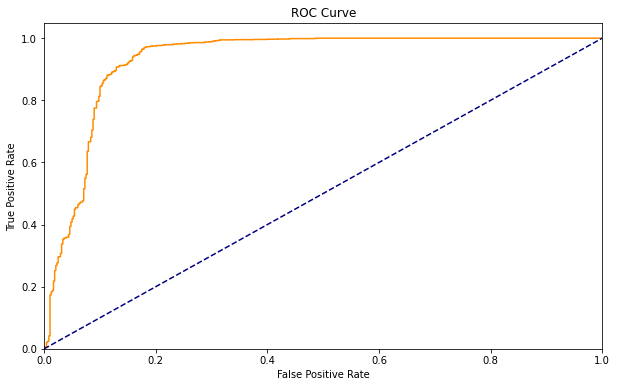

Brier Score:
113.0165469631724


In [23]:
svm_model = SVC(probability=True)

evaluateModel(svm_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1119    0]
 [   0 3428]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      3428

    accuracy                           1.00      4547
   macro avg       1.00      1.00      1.00      4547
weighted avg       1.00      1.00      1.00      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 477    3]
 [   6 1464]]

                  precision    recall  f1-score   support

           0       0.99      0.99      0.99       480
           1       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950

    

AUC for the Model Test Set: 0.9999426020408162


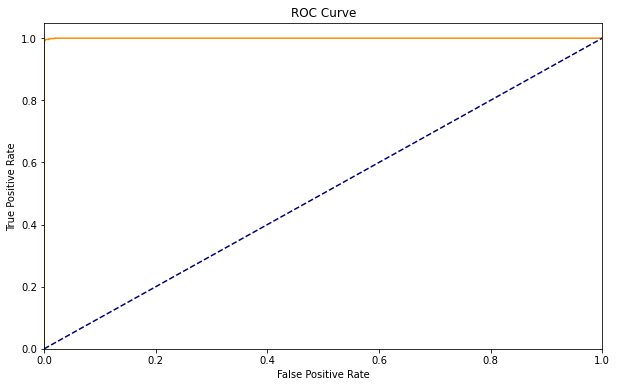

Brier Score:
8.839499999999983


In [24]:
rf = RandomForestClassifier()

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1119    0]
 [   0 3428]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      3428

    accuracy                           1.00      4547
   macro avg       1.00      1.00      1.00      4547
weighted avg       1.00      1.00      1.00      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 478    2]
 [   5 1465]]

                  precision    recall  f1-score   support

           0       0.99      1.00      0.99       480
           1       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       0.99      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950

    

AUC for the Model Test Set: 0.9999284297052153


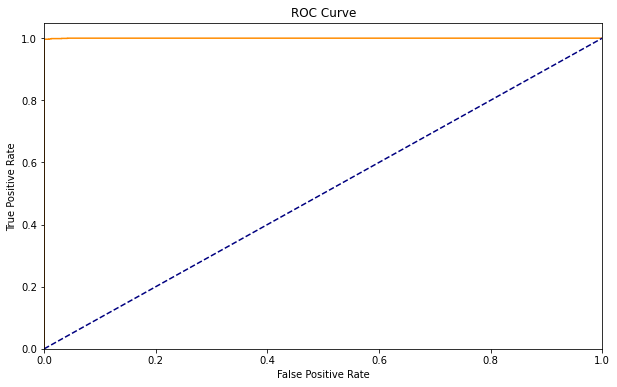

Brier Score:
4.954006775108846


In [25]:
xgb = XGBClassifier()

evaluateModel(xgb, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1119    0]
 [   0 3428]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      3428

    accuracy                           1.00      4547
   macro avg       1.00      1.00      1.00      4547
weighted avg       1.00      1.00      1.00      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 478    2]
 [   6 1464]]

                  precision    recall  f1-score   support

           0       0.99      1.00      0.99       480
           1       1.00      1.00      1.00      1470

    accuracy                           1.00      1950
   macro avg       0.99      1.00      0.99      1950
weighted avg       1.00      1.00      1.00      1950

    

AUC for the Model Test Set: 0.9998844954648527


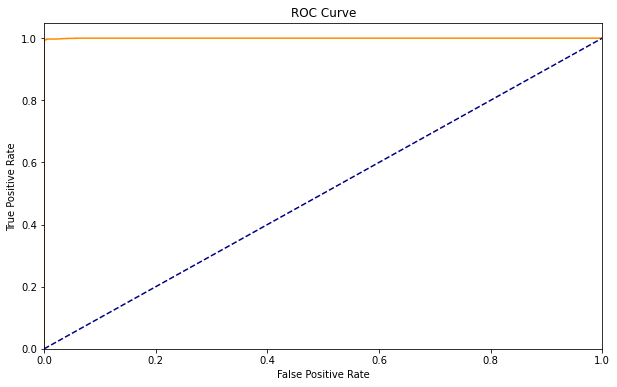

Brier Score:
6.434688569620489


In [26]:
 lgb = LGBMClassifier()

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [27]:
from sklearn.ensemble import AdaBoostClassifier


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[1108   11]
 [   7 3421]]

                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      1119
           1       1.00      1.00      1.00      3428

    accuracy                           1.00      4547
   macro avg       1.00      0.99      0.99      4547
weighted avg       1.00      1.00      1.00      4547

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[ 476    4]
 [   9 1461]]

                  precision    recall  f1-score   support

           0       0.98      0.99      0.99       480
           1       1.00      0.99      1.00      1470

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

    

AUC for the Model Test Set: 0.9996308106575963


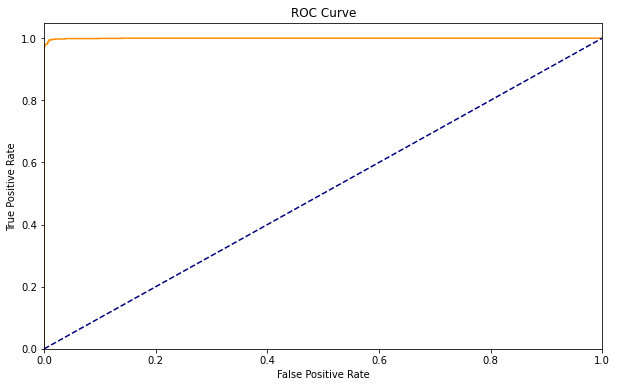

Brier Score:
350.55141136731703


In [28]:
 ada = AdaBoostClassifier(random_state=42)

evaluateModel(ada, X_train, X_test, y_train, y_test)

In [29]:
sorted(list(zip(xgb.feature_importances_, features)))

[(0.0051493854, 'free sulfur dioxide'),
 (0.008744543, 'citric acid'),
 (0.010765948, 'alcohol'),
 (0.012624031, 'residual sugar'),
 (0.013245545, 'fixed acidity'),
 (0.022094695, 'pH'),
 (0.028804269, 'sulphates'),
 (0.030964078, 'density'),
 (0.08135282, 'volatile acidity'),
 (0.20809929, 'chlorides'),
 (0.5781554, 'total sulfur dioxide')]

In [30]:
sorted(list(zip(rf.feature_importances_, features)))

[(0.011049581690015273, 'alcohol'),
 (0.019750917065926868, 'pH'),
 (0.020935742367125143, 'citric acid'),
 (0.045777567074319, 'sulphates'),
 (0.04716936137506874, 'residual sugar'),
 (0.04737214055699491, 'free sulfur dioxide'),
 (0.054479691471705026, 'fixed acidity'),
 (0.0557440737357801, 'density'),
 (0.11558027219134377, 'volatile acidity'),
 (0.24417309972999035, 'chlorides'),
 (0.3379675527417308, 'total sulfur dioxide')]

In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [33]:
xgb.predict([[10,1,.07,5,.05,25,115,1,3,.5,9]])

array([1])

In [36]:
filename = "finalized_model_2.sav"

In [37]:
pickle.dump(xgb, open(filename, 'wb'))